In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


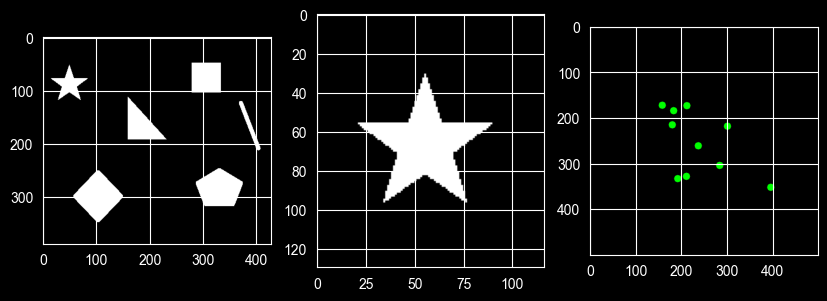

In [18]:
shapes_img = cv.imread("../../../class.vision/images/shapes.png")
star_img = cv.imread("../../../class.vision/images/star.png")

rand_dot_img = np.zeros((500, 500 , 3))
random_points = np.random.randint(100, 400, 20).reshape(10,2)
for p in random_points:
    cv.circle(rand_dot_img, p, 8, (0,255,0), -1)

plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(shapes_img[...,::-1])
plt.subplot(132); plt.imshow(star_img[...,::-1])
plt.subplot(133); plt.imshow(rand_dot_img[...,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


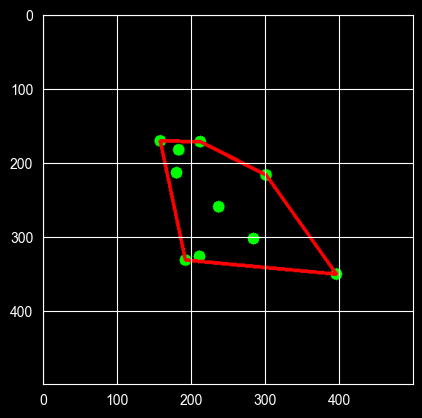

In [19]:
hull = cv.convexHull(random_points)
cv.drawContours(rand_dot_img, [hull], -1, (0,0,255), 3)
plt.imshow(rand_dot_img[...,::-1])

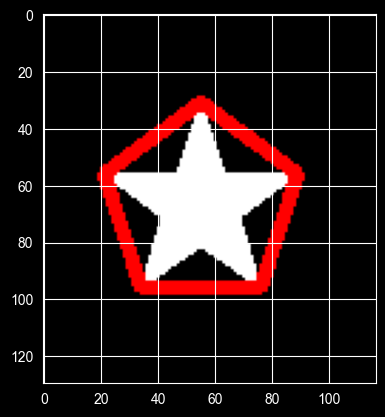

In [21]:
star_gray_img = cv.cvtColor(star_img, cv.COLOR_BGR2GRAY)
star_binary_img = cv.threshold(star_gray_img, 127, 255, cv.THRESH_BINARY)[1]

contours, _ = cv.findContours(star_binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
hull = cv.convexHull(contours[0])
cv.drawContours(star_img, [hull], -1, (0,0,255), 3)
plt.imshow(star_img[...,::-1])

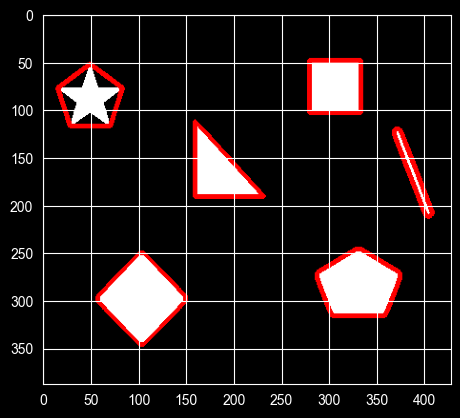

In [23]:
shapes_gray_img = cv.cvtColor(shapes_img, cv.COLOR_BGR2GRAY)
shapes_binary_img = cv.threshold(shapes_gray_img, 127, 255, cv.THRESH_BINARY)[1]

contours, _ = cv.findContours(shapes_binary_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
hulls = []
for c in contours:
    hull = cv.convexHull(c)
    hulls.append(hull)

shapes_bgr_img = shapes_img.copy()

cv.drawContours(shapes_bgr_img, hulls, -1, (0,0,255), 3)
plt.imshow(shapes_bgr_img[...,::-1])